# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 

#build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
#set up empty lists to hold response info
city_name = []
lat = []
temp = []
lon = []
humidity = []
cloudiness = []
wind_speed = []
country = []
index_counter = 0

#loop through cities and request data 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp_max"])
        lon.append(response["coord"]["lon"])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        
        #keep track of records 
        index_counter = index_counter + 1
        
        print(f"Record= {index_counter}: {city}")
        
    except(KeyError,IndexError):
        print('City not found.')
        

        


Record= 1: siniscola
Record= 2: castro
Record= 3: hambantota
City not found.
Record= 4: mataura
Record= 5: bengkulu
Record= 6: east london
Record= 7: coalinga
Record= 8: faanui
Record= 9: salinopolis
Record= 10: vilhena
Record= 11: sergeyevka
Record= 12: tiksi
Record= 13: victoria
Record= 14: inawashiro
Record= 15: dikson
Record= 16: georgetown
Record= 17: ust-kuyga
City not found.
Record= 18: matara
Record= 19: hobart
Record= 20: vaini
Record= 21: hithadhoo
City not found.
Record= 22: chernyshevskiy
Record= 23: luanda
Record= 24: busselton
Record= 25: omsukchan
Record= 26: isiro
City not found.
Record= 27: kysyl-syr
City not found.
Record= 28: leningradskiy
Record= 29: coueron
Record= 30: albany
Record= 31: arraial do cabo
Record= 32: mahebourg
Record= 33: iquique
Record= 34: bredasdorp
Record= 35: rikitea
Record= 36: nikolskoye
Record= 37: fort nelson
Record= 38: bushenyi
Record= 39: hit
City not found.
Record= 40: yellowknife
City not found.
Record= 41: guerrero negro
City not found

Record= 353: sao felix do xingu
Record= 354: naze
Record= 355: nara
Record= 356: urumqi
Record= 357: linjiang
Record= 358: hami
Record= 359: berlevag
Record= 360: sao miguel do araguaia
Record= 361: marienburg
City not found.
Record= 362: aykhal
Record= 363: esperance
Record= 364: lodja
Record= 365: sulangan
Record= 366: sao jose da coroa grande
Record= 367: petropavlovsk-kamchatskiy
Record= 368: thohoyandou
Record= 369: akdepe
Record= 370: hoi an
Record= 371: conceicao do araguaia
Record= 372: nabire
Record= 373: abbeville
Record= 374: aklavik
Record= 375: vostok
Record= 376: alofi
Record= 377: presidencia roque saenz pena
Record= 378: te anau
Record= 379: sistranda
Record= 380: geraldton
Record= 381: tacuarembo
Record= 382: nizhniy bestyakh
Record= 383: santa luzia
Record= 384: vuktyl
Record= 385: boa vista
Record= 386: sokolo
Record= 387: sur
Record= 388: zvishavane
Record= 389: shelburne
Record= 390: the pas
City not found.
Record= 391: isabela
City not found.
Record= 392: buala
Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create pandas dataframe
weather_df=pd.DataFrame({"City": city_name,
                       "Latitude": lat,
                       "Temperature": temp,
                       "Longitude": lon,
                       "Humidity": humidity,
                       "Cloudiness": cloudiness,
                       "Wind Speed": wind_speed})
weather_df.head()
weather_df.count()

#save city data into csv file 
weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

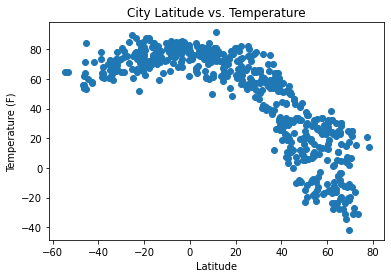

In [8]:
#create latitude vs. Temperature scatter plot
plt.scatter(weather_df["Latitude"],weather_df["Temperature"])

#create title
plt.title("City Latitude vs. Temperature")

#create x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.show()


## Latitude vs. Humidity Plot

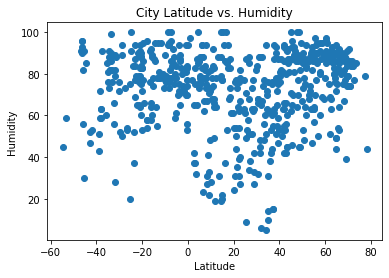

In [9]:
#create latitude vs. Temperature scatter plot
plt.scatter(weather_df["Latitude"],weather_df["Humidity"])

#create title
plt.title("City Latitude vs. Humidity")

#create x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

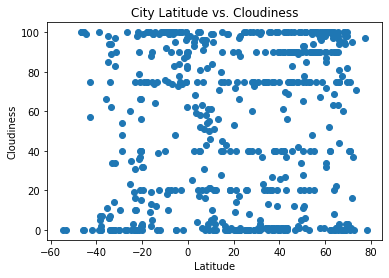

In [10]:
#create latitude vs. Temperature scatter plot
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"])

#create title
plt.title("City Latitude vs. Cloudiness")

#create x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

## Latitude vs. Wind Speed Plot

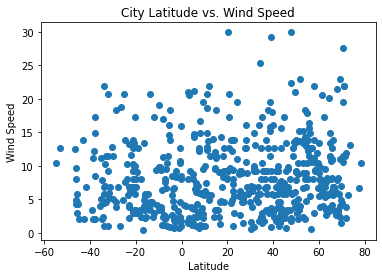

In [11]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"])

#create title
plt.title("City Latitude vs. Wind Speed")

#create x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

## Linear Regression

In [12]:
#create southern and northern hemisphere dataframes
northern_hem = weather_df.loc[weather_df["Latitude"] >=0]
southern_hem = weather_df.loc[weather_df["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.86
y = -0.53 x + 58.89


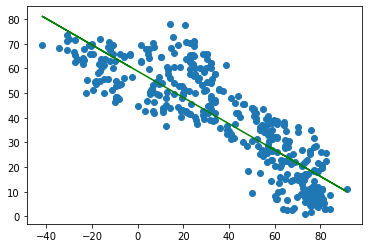

In [14]:
x_values = northern_hem['Temperature']
y_values = northern_hem['Latitude']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.59
y = 0.97 x + -91.68


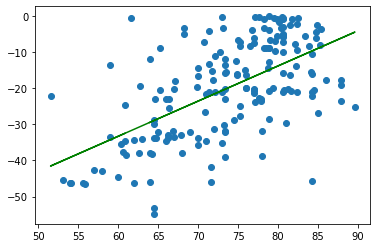

In [15]:
x_values = southern_hem['Temperature']
y_values = southern_hem['Latitude']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.28
y = 0.29 x + 18.47


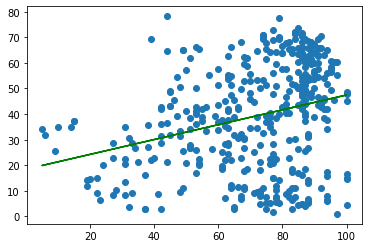

In [16]:
x_values = northern_hem['Humidity']
y_values = northern_hem['Latitude']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.19
y = 0.17 x + -33.2


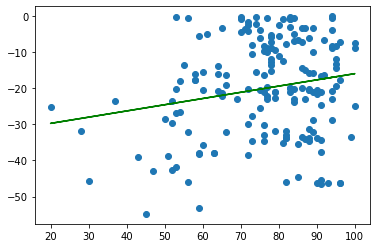

In [17]:
x_values = southern_hem['Humidity']
y_values = southern_hem['Latitude']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.16
y = 0.08 x + 34.79


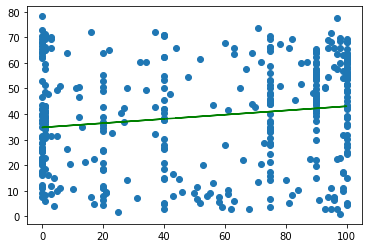

In [18]:
x_values = northern_hem['Cloudiness']
y_values = northern_hem['Latitude']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.31
y = 0.11 x + -25.83


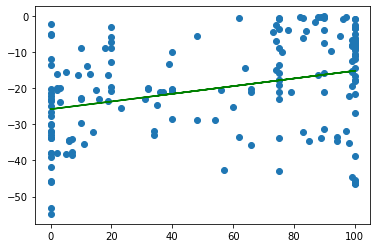

In [19]:
x_values = southern_hem['Cloudiness']
y_values = southern_hem['Latitude']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.06
y = 0.23 x + 37.13


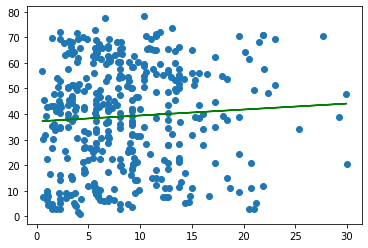

In [20]:
x_values = northern_hem['Wind Speed']
y_values = northern_hem['Latitude']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.1
y = -0.28 x + -18.02


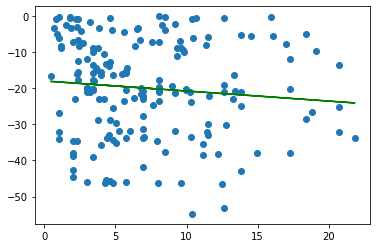

In [21]:
x_values = southern_hem['Wind Speed']
y_values = southern_hem['Latitude']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")